<h1 style="color: red;">III- Clustering and Manifold Learning</h1>

<h2 style="color: green;">1-Import Python Modules and Dataset </h2>

In [3]:
    # Import necessary libraries
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.cluster import KMeans
    from sklearn.manifold import TSNE, MDS
    from sklearn.metrics import silhouette_score
    from sklearn.preprocessing import StandardScaler
    
    
    # Load the preprocessed dataset
    df = pd.read_csv('bank_prepared_dataset.csv')
    
    # Display the first few rows of the dataset
    df.head()

,age,education,default,balance,housing,loan,campaign,previous,job_blue-collar,job_entrepreneur,...,job_services,job_student,job_technician,job_unemployed,job_nan,marital_married,marital_single,marital_nan,contact_telephone,contact_nan
0,-0.333333,3.0,0,-0.186721,1,0,1.0,0.000000,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.055556,2.0,0,0.121845,1,1,1.0,-0.584963,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.166667,2.0,0,0.346018,1,1,1.0,-0.584963,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.500000,2.0,0,-0.178394,1,1,0.0,0.000000,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.888889,2.0,0,0.329321,1,0,0.0,-0.584963,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# 2- Scatterplot Function (to visualize clustering)
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='Set1', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend(title='Cluster')
    plt.show()


In [ ]:
# !pip install yellowbrick

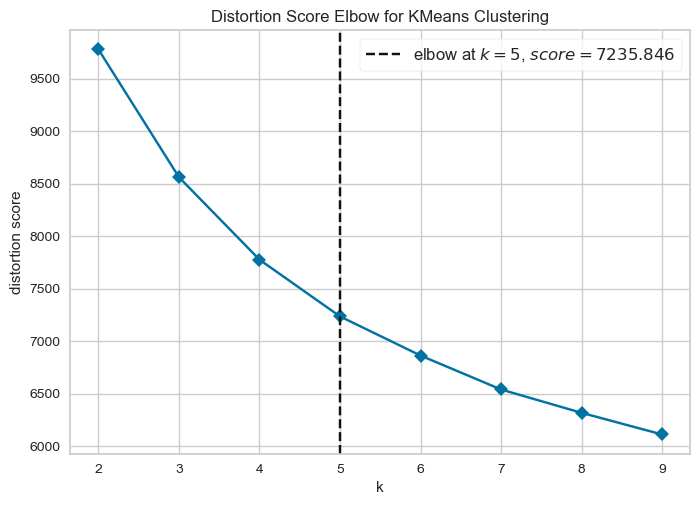

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
from yellowbrick.cluster import KElbowVisualizer
# Determine the optimal number of clusters using the elbow method
model = KMeans(n_init=10)
elbow_visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion', timings=False)
elbow_visualizer.fit(df)
elbow_visualizer.show()


## Interpretation of the Elbow Method

The plot above represents the **Elbow Method** used to determine the optimal number of clusters for K-Means clustering. The x-axis represents the number of clusters (k), while the y-axis represents the **distortion score**, which measures the sum of squared distances from each point to its assigned cluster center.

### Key Observations:
- The distortion score decreases as the number of clusters increases, which is expected since adding more clusters reduces the intra-cluster variance.
- The **"elbow point"** is observed at **k = 5**, where the rate of decrease in distortion score slows down significantly.
- Beyond **k = 5**, adding more clusters results in only minor improvements, indicating diminishing returns.

### Conclusion:
Based on the **Elbow Method**, the optimal number of clusters for this dataset is **5**. This means that segmenting the data into 5 clusters is likely to provide a good balance between minimizing intra-cluster variance and avoiding excessive complexity.
